In [9]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import healpy as hp
import os

In [91]:
path = os.getcwd() + '/FITSfiles'
MAPS = os.listdir(path)
I = []
for i in MAPS:
    if i != '.DS_Store':
        s = os.path.join(path,i)
        s1 = fits.open(s,ignore_missing_simple=True)
        I1 = s1[1].data['I_STOKES']
        I.append(I1)
print(MAPS)
print(I)        

['HFI_2048_100.fits', '.DS_Store', 'LFI_1024_070.fits', 'LFI_1024_030.fits', 'LFI_2048_070.fits', 'LFI_1024_044.fits', 'HFI_2048_217.fits', 'HFI_2048_353.fits', 'HFI_2048_143.fits', 'HFI_2048_857.fits', 'HFI_2048_545.fits']
[array([0.00268328, 0.00322367, 0.00262918, ..., 0.00361414, 0.00356916,
       0.0035507 ], dtype=float32), array([0.00249419, 0.00388048, 0.00218865, ..., 0.00172047, 0.00161871,
       0.00148168], dtype=float32), array([0.01098552, 0.01152858, 0.01046503, ..., 0.0088962 , 0.00902609,
       0.00882776], dtype=float32), array([0.00235509, 0.00274433, 0.00218518, ..., 0.00165539, 0.001501  ,
       0.00130304], dtype=float32), array([0.0043145 , 0.00456445, 0.00398904, ..., 0.00296413, 0.00300633,
       0.00302288], dtype=float32), array([0.00953347, 0.01025562, 0.01006505, ..., 0.01728222, 0.01730245,
       0.01743893], dtype=float32), array([0.06844895, 0.07369534, 0.07261463, ..., 0.12860575, 0.1281015 ,
       0.13011235], dtype=float32), array([0.0027041 , 

In [92]:

#https://docs.astropy.org/en/stable/io/fits/index.html
c0 = fits.Column(name='030',array=I[2],format='E')
c1 = fits.Column(name='044',array=I[4],format='E')
c2 = fits.Column(name='10_070',array=I[1],format='E')
c3 = fits.Column(name='20_070',array=I[3],format='E')
c4 = fits.Column(name='100',array=I[0],format='E')
c5 = fits.Column(name='143',array=I[7],format='E')
c6 = fits.Column(name='217',array=I[5],format='E')
c7 = fits.Column(name='353',array=I[6],format='E')
c8 = fits.Column(name='545',array=I[9],format='E')
c9 = fits.Column(name='857',array=I[8],format='E')
t = fits.BinTableHDU.from_columns([c0,c1,c2])
t.writeto('I_STOKES1024.fits',overwrite=True)
t1 = fits.BinTableHDU.from_columns([c3,c4,c5,c6,c7,c8,c9])
t1.writeto('I_STOKES2084.fits',overwrite=True)

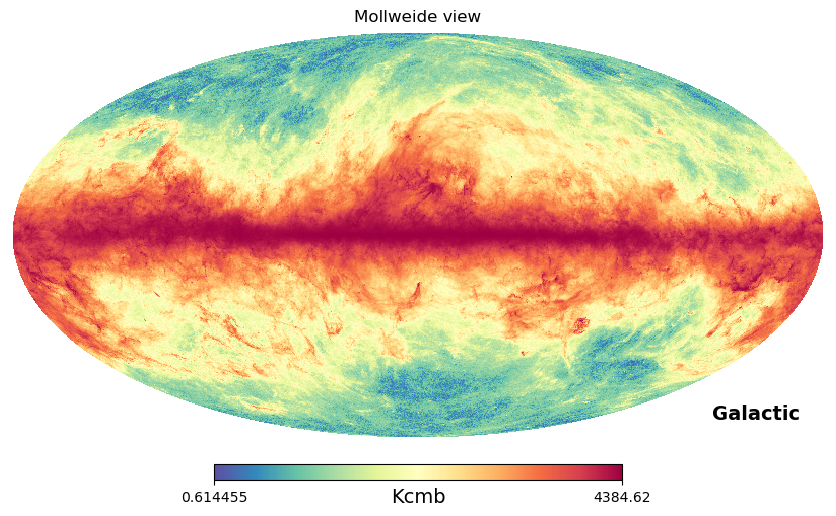

In [111]:
path = os.listdir(os.getcwd() + '/I_STOKES')
for i in path:
    if i == 'I_STOKES1024.fits':
        f = os.path.join(os.getcwd() + '/I_STOKES',i)
        I10 = fits.open(f)
    else:
        f = os.path.join(os.getcwd() + '/I_STOKES',i)
        I20 = fits.open(f)

x = I20[1].data['857']
hp.mollview(x,norm='hist',coord='G',nest=True,flip='astro',unit='Kcmb',cmap='Spectral_r')